In [72]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('iris.csv')

In [6]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
df.tail()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [8]:
df.sample(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
6,4.6,3.4,1.4,0.3,Setosa
56,6.3,3.3,4.7,1.6,Versicolor
55,5.7,2.8,4.5,1.3,Versicolor
86,6.7,3.1,4.7,1.5,Versicolor
9,4.9,3.1,1.5,0.1,Setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# check null values 
df.isnull().sum() 

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64

- There is no any null value in dataset

In [11]:
# checking for duplicated data
df.duplicated().sum()

1

- There is 1 duplicated row  in dataset, we will remove it

In [12]:
# remove duplicated row
df.drop_duplicates(inplace=True)

# check again
df.duplicated().sum()

0

In [13]:
df.shape

(149, 5)

In [14]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')

# Exploratory data analysis

## 1. Columns Types
1. Numerical columns: ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
2. categorical column: 'Class' 

## 2. univariate analysis

#### A. Sepal_Length

In [16]:
df['Sepal_Length'].describe()

count    149.000000
mean       5.843624
std        0.830851
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: Sepal_Length, dtype: float64

<AxesSubplot:xlabel='Sepal_Length', ylabel='Count'>

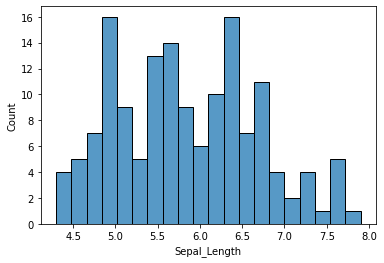

In [20]:
# histogram
sns.histplot(x=df['Sepal_Length'], bins=20)

<AxesSubplot:xlabel='Sepal_Length', ylabel='Density'>

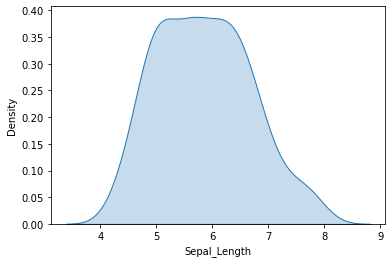

In [21]:
# kde plot
sns.kdeplot(x=df['Sepal_Length'], fill=True)

In [22]:
# skewness
df['Sepal_Length'].skew()

0.31282618518725164

- Sepal_length data is having skewness value 0.31282618518725164, which shows that little bit positive , then it is positively skewed data.

<AxesSubplot:xlabel='Sepal_Length'>

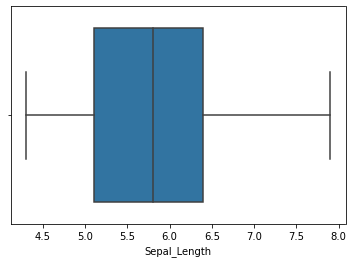

In [23]:
# check outliers in sepal length
sns.boxplot(x=df['Sepal_Length'])

### B. Sepal_width

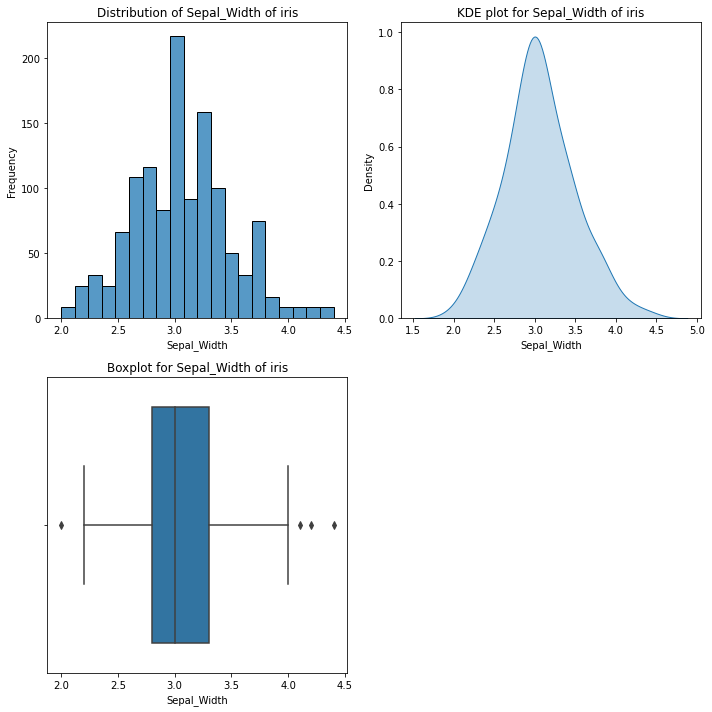

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Histogram
sns.histplot(x=df['Sepal_Width'], bins=20, stat='frequency', ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Sepal_Width of iris')

# KDE plot
sns.kdeplot(x=df['Sepal_Width'], fill=True, ax=ax[0, 1])
ax[0, 1].set_title('KDE plot for Sepal_Width of iris')

# Boxplot
sns.boxplot(x=df['Sepal_Width'], ax=ax[1, 0])
ax[1, 0].set_title('Boxplot for Sepal_Width of iris')

ax[1,1].axis('off')

plt.tight_layout()

plt.show()

- there are some outliers in sepal_width colunms, we will remove them by Iqr method

In [30]:
# make fuction for remove outlier
def remove_outlier(data, column):
    #  quartiles and IQR for the specified column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers outside the bounds for the specified column
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return data

In [26]:
# skewness for sepal width
df['Sepal_Width'].skew()

0.30714862900770284

- Sepal_width data is having skewness value 0.30714862900770284, which shows that little bit positive , then it is positively skewed data.

In [31]:
# remove outliers from sepal width
new_df = remove_outlier(df, 'Sepal_Width')

<AxesSubplot:xlabel='Sepal_Width'>

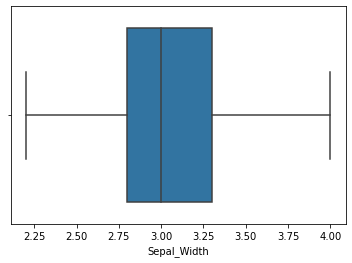

In [32]:
sns.boxplot(x=new_df['Sepal_Width'])

<AxesSubplot:xlabel='Sepal_Width'>

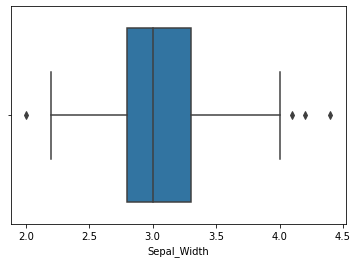

In [33]:
sns.boxplot(x=df['Sepal_Width']) # original data 

### C. Petal_Length

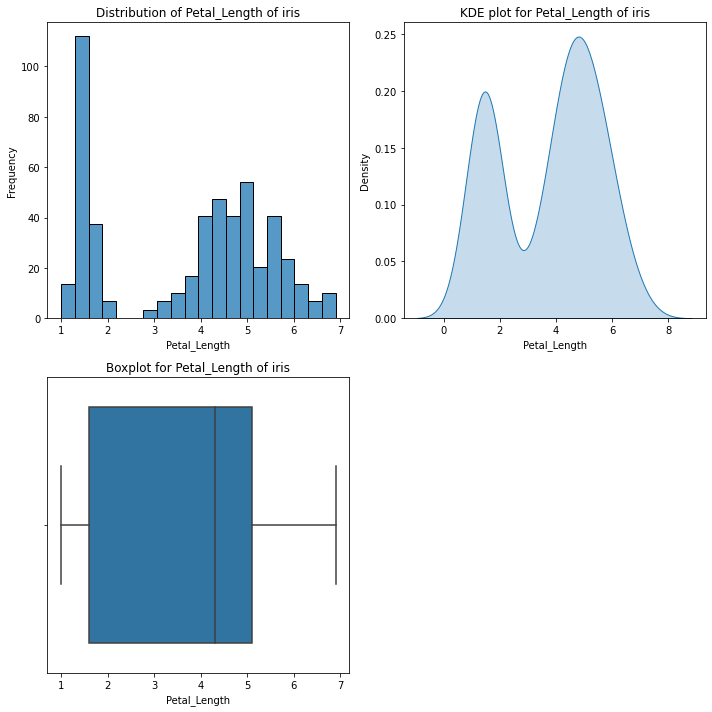

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Histogram
sns.histplot(x=df['Petal_Length'], bins=20, stat='frequency', ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Petal_Length of iris')

# KDE plot
sns.kdeplot(x=df['Petal_Length'], fill=True, ax=ax[0, 1])
ax[0, 1].set_title('KDE plot for Petal_Length of iris')

# Boxplot
sns.boxplot(x=df['Petal_Length'], ax=ax[1, 0])
ax[1, 0].set_title('Boxplot for Petal_Length of iris')

ax[1,1].axis('off')

plt.tight_layout()

plt.show()

In [37]:
# skewness
df['Petal_Length'].skew()  

-0.2631010864738464

- There are no any outlier in Petal_Length column
- Petal_length data is having skewness value -0.2631010864738464, which shows that little bit negative , then it is negatively skewed data.

### D. Petal_Width

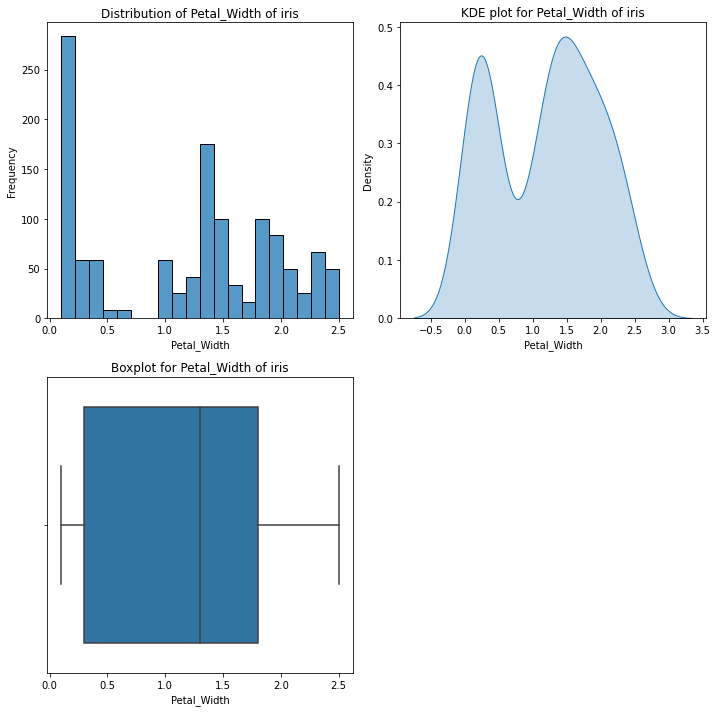

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Histogram
sns.histplot(x=df['Petal_Width'], bins=20, stat='frequency', ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Petal_Width of iris')

# KDE plot
sns.kdeplot(x=df['Petal_Width'], fill=True, ax=ax[0, 1])
ax[0, 1].set_title('KDE plot for Petal_Width of iris')

# Boxplot
sns.boxplot(x=df['Petal_Width'], ax=ax[1, 0])
ax[1, 0].set_title('Boxplot for Petal_Width of iris')

ax[1,1].axis('off')

plt.tight_layout()

plt.show()

In [29]:
# skewness
df['Petal_Width'].skew()

-0.09007614642546066

- There are no any outlier in Petal_width column
- Petal_width data is having skewness value -0.09007614642546066, which shows that little bit negative , then it is negatively skewed data.

### E. Class - it is categorical column

In [39]:
df['Class'].value_counts()

Setosa        50
Versicolor    50
Virginica     49
Name: Class, dtype: int64

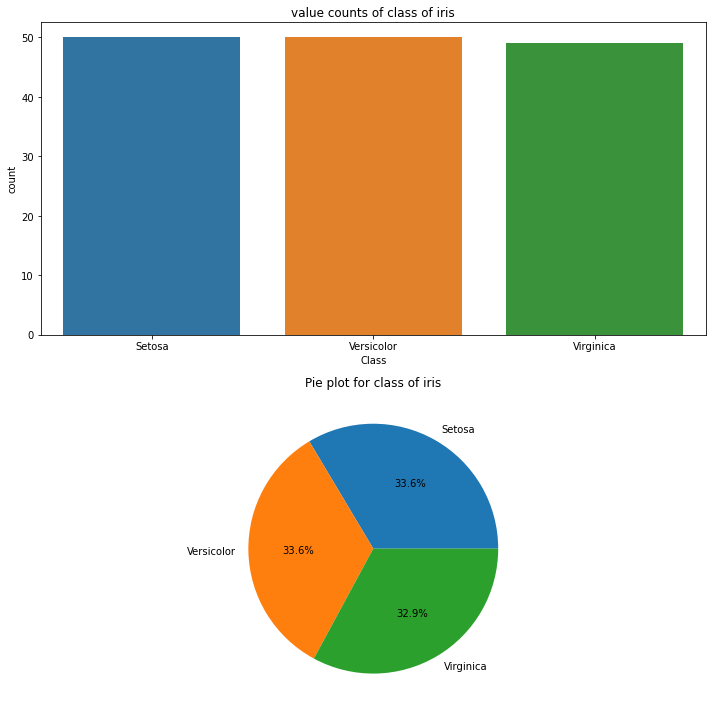

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# countplot to check value counts
sns.countplot(x=df['Class'], ax=ax[0])
ax[0].set_title('value counts of class of iris')

# pie plot
class_counts = df['Class'].value_counts()
ax[1].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
ax[1].set_title('Pie plot for class of iris')



plt.tight_layout()

plt.show()

- Sentosa and Versicolor classes of iris ara having same count.
- Virginica class has less counts than other two classes

## 2. Bivariate analysis

### A. Sepal_Length with Class 


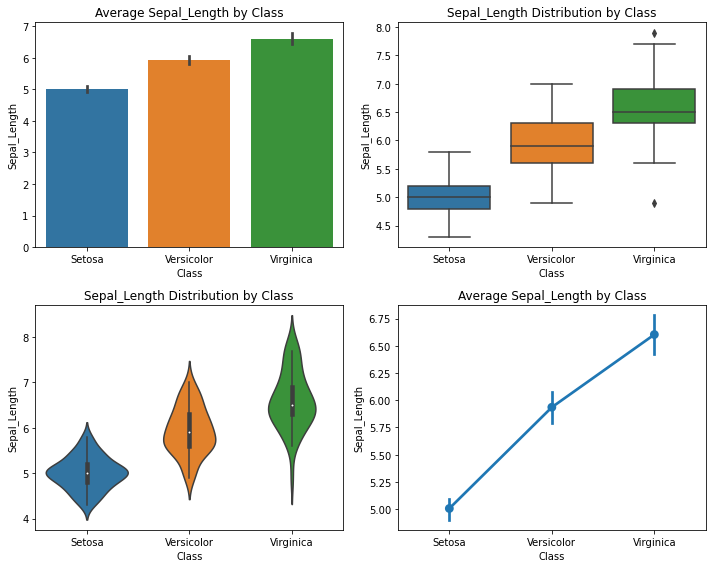

In [46]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Bar Plot
sns.barplot(x='Class', y='Sepal_Length', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Average Sepal_Length by Class')

# Box Plot
sns.boxplot(x='Class', y='Sepal_Length', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Sepal_Length Distribution by Class')

# Violin Plot
sns.violinplot(x='Class', y='Sepal_Length', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Sepal_Length Distribution by Class')

# Point Plot
sns.pointplot(x='Class', y='Sepal_Length', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Average Sepal_Length by Class')

plt.tight_layout()
plt.show()

- The "Virginica" class has the highest average sepal length among the three classes of iris.
- The "Sentosa" class has the lowest average sepal length among the three classes of iris.

### B. Sepal_Width of differenct classes of iris

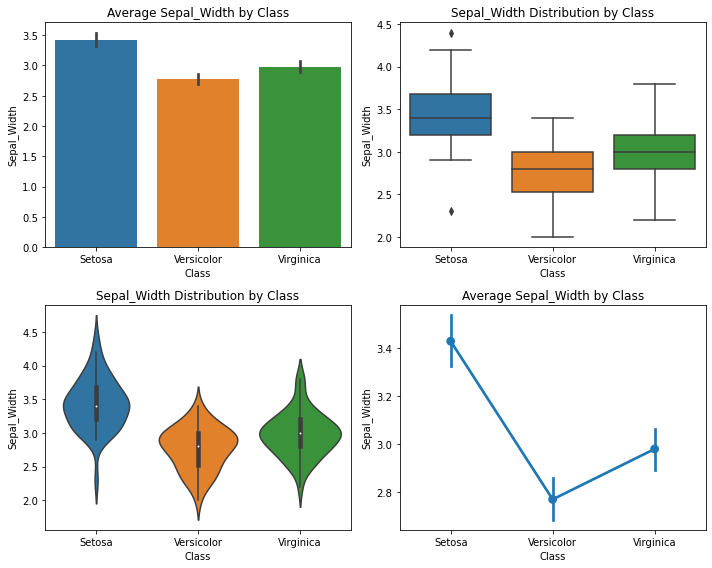

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Bar Plot
sns.barplot(x='Class', y='Sepal_Width', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Average Sepal_Width by Class')

# Box Plot
sns.boxplot(x='Class', y='Sepal_Width', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Sepal_Width Distribution by Class')

# Violin Plot
sns.violinplot(x='Class', y='Sepal_Width', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Sepal_Width Distribution by Class')

# Point Plot
sns.pointplot(x='Class', y='Sepal_Width', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Average Sepal_Width by Class')

plt.tight_layout()
plt.show()

- The "Sentosa" class has the highest average Sepal Width among the three classes of iris.
- The "Versicolor" class has the lowest average sepal length among the three classes of iris.

### C. Petal_Length and Class of Iris

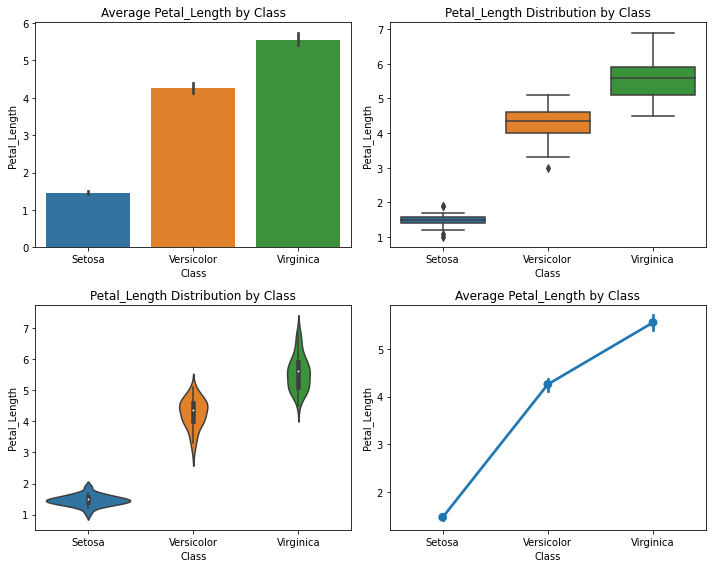

In [48]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Bar Plot
sns.barplot(x='Class', y='Petal_Length', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Average Petal_Length by Class')

# Box Plot
sns.boxplot(x='Class', y='Petal_Length', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Petal_Length Distribution by Class')

# Violin Plot
sns.violinplot(x='Class', y='Petal_Length', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Petal_Length Distribution by Class')

# Point Plot
sns.pointplot(x='Class', y='Petal_Length', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Average Petal_Length by Class')

plt.tight_layout()
plt.show()

- The "Virginica" class has the highest average petal length among the three classes of iris.
- The "Sentosa" class has the lowest average petal length among the three classes of iris.

### D. Petal_Width and class of iris

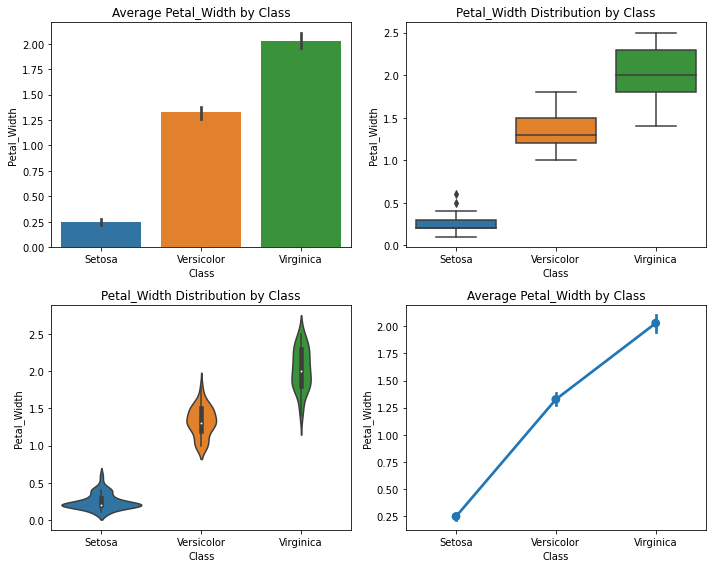

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Bar Plot
sns.barplot(x='Class', y='Petal_Width', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Average Petal_Width by Class')

# Box Plot
sns.boxplot(x='Class', y='Petal_Width', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Petal_Width Distribution by Class')

# Violin Plot
sns.violinplot(x='Class', y='Petal_Width', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Petal_Width Distribution by Class')

# Point Plot
sns.pointplot(x='Class', y='Petal_Width', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Average Petal_Width by Class')

plt.tight_layout()
plt.show()

- The "Virginica" class has the highest average petal width among the three classes of iris.
- The "Sentosa" class has the lowest average petal width among the three classes of iris.

## 4. multivariate  analysis

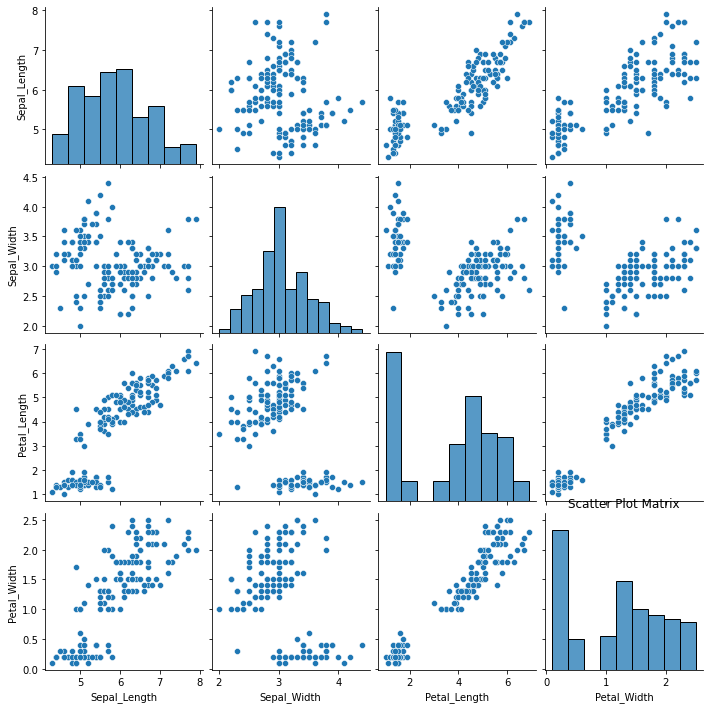

In [51]:
# Scatter Plot Matrix ( it will only take numerical columns)
sns.pairplot(df)
plt.title('Scatter Plot Matrix')
plt.show()

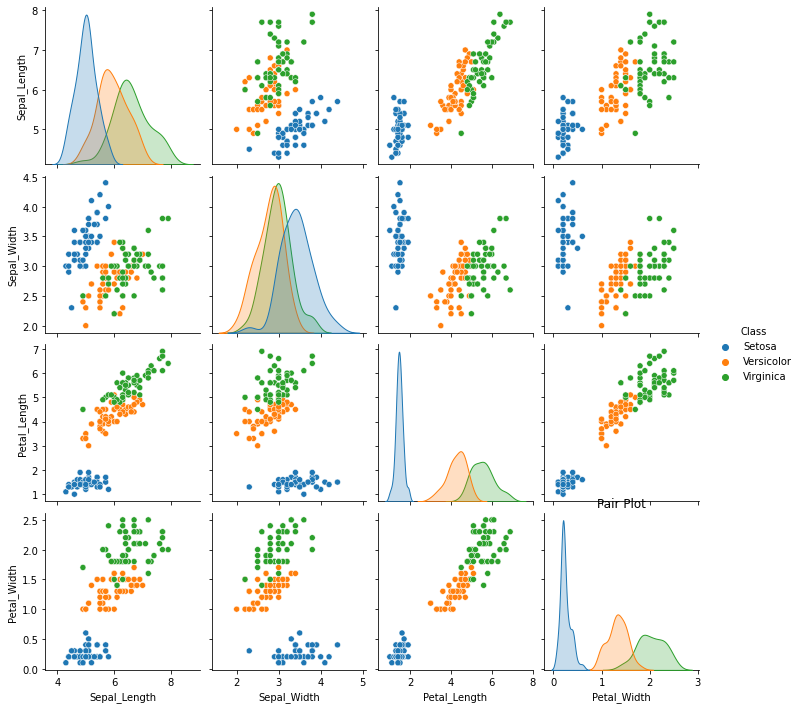

In [52]:
# Pair Plot using target column
sns.pairplot(df, hue='Class')
plt.title('Pair Plot')
plt.show()

#### heatmap

In [54]:
# correlation
corr_matrix = df.corr()
corr_matrix

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.118129,0.873738,0.820620
Sepal_Width,-0.118129,1.000000,-0.426028,-0.362894
Petal_Length,0.873738,-0.426028,1.000000,0.962772
Petal_Width,0.820620,-0.362894,0.962772,1.000000


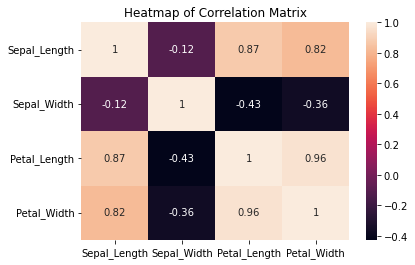

In [55]:
sns.heatmap(corr_matrix, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

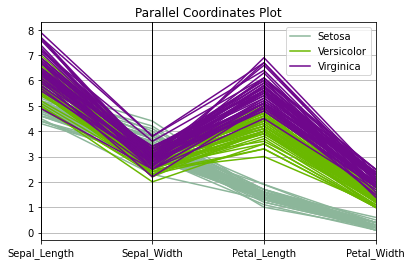

In [56]:
# Parallel Coordinates Plot
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, 'Class')
plt.title('Parallel Coordinates Plot')
plt.show()


In [57]:
new_df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


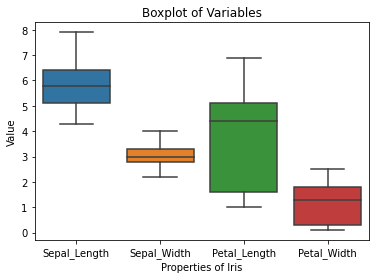

In [62]:
sns.boxplot(data=new_df) 
# Set labels and title
plt.xlabel('Properties of Iris')
plt.ylabel('Value')
plt.title('Boxplot of Variables')

# Display the plot
plt.show()

In [64]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [63]:
new_df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,145.000000,145.000000,145.000000,145.000000
mean,5.857241,3.042759,3.797931,1.215862
std,0.836971,0.398216,1.760819,0.759905
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [77]:
# data is skewed so we are applying log transformation
df_log = new_df.drop('Class', axis=1).apply(lambda x : np.log1p(x))

In [78]:
df_log['Sepal_Length'].skew()

0.04649157571563882

In [80]:
df_log.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,1.808289,1.504077,0.875469,0.182322
1,1.774952,1.386294,0.875469,0.182322
2,1.740466,1.435085,0.832909,0.182322
3,1.722767,1.410987,0.916291,0.182322
4,1.791759,1.526056,0.875469,0.182322


In [82]:
# select independent and dependent variable

X = df_log
y = new_df['Class'] 

In [83]:
X.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,1.808289,1.504077,0.875469,0.182322
1,1.774952,1.386294,0.875469,0.182322
2,1.740466,1.435085,0.832909,0.182322
3,1.722767,1.410987,0.916291,0.182322
4,1.791759,1.526056,0.875469,0.182322


In [84]:
y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: Class, dtype: object

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (116, 4)
Shape of X_test:  (29, 4)
Shape of y_train:  (116,)
Shape of y_test:  (29,)


# label encoder on target column

In [91]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encode = label_encoder.fit_transform(y_train)

y_test_encode = label_encoder.transform(y_test)

In [92]:
label_encoder.classes_

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [88]:
# standard scacler
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [90]:

# Create new DataFrames with the scaled values
X_train_scaled = pd.DataFrame(X_train_scale, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scale, columns=X_test.columns)

# model creation



In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 1. Logistic regression

In [109]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train_scaled, y_train_encode)

lg_pred = lg.predict(X_test_scaled)

print(classification_report(y_test_encode, lg_pred))
print(confusion_matrix(y_test_encode, lg_pred))
lg_score = accuracy_score(y_test_encode, lg_pred)
print('Accuracy score for logistic regression: ',lg_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

[[10  0  0]
 [ 0  8  0]
 [ 0  0 11]]
Accuracy score for logistic regression:  1.0


## 2. Support Vector Classifier

In [108]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled, y_train_encode)

svc_pred = svc.predict(X_test_scaled)

print(classification_report(y_test_encode, svc_pred))
print(confusion_matrix(y_test_encode, svc_pred))
svc_score = accuracy_score(y_test_encode, svc_pred)
print('Accuracy score for support vector classifier: ',svc_score)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

[[10  0  0]
 [ 0  8  0]
 [ 0  0 11]]
Accuracy score for support vector classifier:  1.0


## 3. Decision Tree classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train_encode)

dtc_pred = dtc.predict(X_test_scaled)

print(classification_report(y_test_encode, dtc_pred))
print(confusion_matrix(y_test_encode, dtc_pred))
dtc_score = accuracy_score(y_test_encode, dtc_pred)
print('Accuracy score for Decision tree classifier: ',dtc_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94         8
           2       1.00      0.91      0.95        11

    accuracy                           0.97        29
   macro avg       0.96      0.97      0.96        29
weighted avg       0.97      0.97      0.97        29

[[10  0  0]
 [ 0  8  0]
 [ 0  1 10]]
Accuracy score for Decision tree classifier:  0.9655172413793104


## 4. Random Forest Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train_encode)

rfc_pred = rfc.predict(X_test_scaled)

print(classification_report(y_test_encode, rfc_pred))
print(confusion_matrix(y_test_encode, rfc_pred))
rfc_score = accuracy_score(y_test_encode, rfc_pred)
print('Accuracy score for Random forest classifier: ',rfc_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

[[10  0  0]
 [ 0  8  0]
 [ 0  0 11]]
Accuracy score for Random forest classifier:  1.0


## 5. Naive bayes 

In [106]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train_encode)

gnb_pred = gnb.predict(X_test_scaled)

print(classification_report(y_test_encode, gnb_pred))
print(confusion_matrix(y_test_encode, gnb_pred))
gnb_score = accuracy_score(y_test_encode, gnb_pred)
print('Accuracy score for Gaussian naive bayes : ',gnb_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

[[10  0  0]
 [ 0  8  0]
 [ 0  0 11]]
Accuracy score for Gaussian naive bayes :  1.0


## 6. k nearest neighbors

In [103]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(1,16,2):
    knn = KNeighborsClassifier()
    knn.fit(X_train_scaled,y_train_encode)
    knn_pred = knn.predict(X_test_scaled)
    acsr = accuracy_score(y_test_encode,knn_pred)
    print(f"k=={k}, then accuracy score is {acsr}")

k==1, then accuracy score is 0.9310344827586207
k==3, then accuracy score is 0.9310344827586207
k==5, then accuracy score is 0.9310344827586207
k==7, then accuracy score is 0.9310344827586207
k==9, then accuracy score is 0.9310344827586207
k==11, then accuracy score is 0.9310344827586207
k==13, then accuracy score is 0.9310344827586207
k==15, then accuracy score is 0.9310344827586207


In [111]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train_encode)
knn_pred = knn.predict(X_test_scaled)
knn_score = accuracy_score(y_test_encode,knn_pred)
print(f"k=={k}, then accuracy score is {np.round(knn_score,3)}")

k==15, then accuracy score is 0.931


# store all score and model names in  a dataframe

In [112]:
data = {'ML Algorithms':['Logistic Regression', 'Support Vector Classifier', 'Decision tree Classifier','Random Forest Classifier','Naive Bayes','K Neighbors Classifier'],
        'Model name':['lg','svc','dtc','rfc','gnb','knn'],
        'Accuracy score':[lg_score,svc_score,dtc_score,rfc_score,gnb_score,knn_score]}

score_df = pd.DataFrame(data)

In [113]:
score_df

,ML Algorithms,Model name,Accuracy score
0,Logistic Regression,lg,1.000000
1,Support Vector Classifier,svc,1.000000
2,Decision tree Classifier,dtc,0.965517
3,Random Forest Classifier,rfc,1.000000
4,Naive Bayes,gnb,1.000000
5,K Neighbors Classifier,knn,0.931034


- So I have tried 6 machine learning algorithms and check each models score, 4 model are giving best score.
- we can pick up one of 4 models and store it in pickle file 

In [114]:
import joblib

# store cleaned data
new_df.to_csv('Cleaned_iris_data.csv')

# store model
joblib.dump(lg, 'logistic_regression_model.pkl')

joblib.dump(svc, 'support_vector_classifier_model.pkl')

joblib.dump(rfc, 'ramdom_forest_classifier_model.pkl')

joblib.dump(gnb, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']